# 回帰　重回帰
## 参考著書：機械学習のエッセンス

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

$$
最小二乗法より、誤差が最も低いｗは、
w \quad = \quad {(\tilde{X}^T \tilde{X})}^{-1} \tilde{X}^T \boldsymbol{y}
$$

In [2]:
# linearreg クラス
from scipy import linalg

class LinearRegression:
    def __init__(self) :
        self.w_ = None
    
    def fit(self, X, y):
        intercept = np.ones((X.shape[0],1))
        Xtil = np.concatenate((intercept, X), axis=1)
        A = np.dot(Xtil.T,Xtil)
        b = np.dot(Xtil.T, y)
        self.w_ = linalg.solve(A,b)
    
    def predict(self,X):
        if X.ndim == 1 :
            X = X.reshape(1,-1)  #1行○列
        Xtil = np.c_[np.ones(X.shape[0],X)]
        return np.dot(Xtil,self.w_)   

In [3]:
n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n,2)) * scale
w0,w1,w2 = 1,2,3
y = w0 + w1*X[:,0] + w2*X[:,1] + np.random.randn(n)

In [8]:
# 重回帰モデル
model1 = LinearRegression()
model1.fit(X,y)
print ('係数＝',model1.w_)

係数＝ [1.11450326 1.95737004 3.00295751]


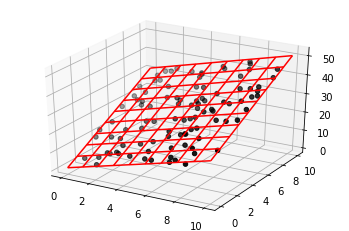

In [15]:
# 可視化
xmesh , ymesh = np.meshgrid(np.linspace(0,scale,10),np.linspace(0,scale,10))
zmesh = (model1.w_[0] + model1.w_[1] * xmesh.ravel() + model1.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
flg = plt.figure()
ax = flg.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y,color='k')
ax.plot_wireframe(xmesh,ymesh,zmesh,color='red')
plt.show()